In [2]:
# PART A

import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt


In [3]:
#1

data = pd.read_csv('Car_Detail.csv')

#checking to see if there are any null values or typos 
print('Values for driven_wheels are: ')  
print(data['Driven_Wheels'].value_counts())
print('There are ' + str(data['Driven_Wheels'].isnull().sum()) + ' null values')

#subsetting cars with only all wheel drive
all_wheel_drive = data[data['Driven_Wheels'] == 'all wheel drive']
awd_bymake = all_wheel_drive.groupby('Make')['Driven_Wheels'].count()

print("All wheel drive per make: ")
print(awd_bymake)

#subsetting cars with only rear wheel drive
rear_wheel = data[data['Driven_Wheels'] == 'rear wheel drive']
rw_bymake = rear_wheel.groupby('Make')['Driven_Wheels'].count()
print(rw_bymake.idxmax() + " has the most cars with rear wheel drive. " + "Total of " + str(rw_bymake.max()) + " cars")

Values for driven_wheels are: 
front wheel drive    4787
rear wheel drive     3371
all wheel drive      2353
four wheel drive     1403
Name: Driven_Wheels, dtype: int64
There are 0 null values
All wheel drive per make: 
Make
Acura             69
Audi             254
BMW              144
Bentley           48
Bugatti            3
Buick             47
Cadillac         122
Chevrolet         51
Chrysler          29
Dodge             44
FIAT               7
Ferrari            3
Ford              94
GMC               42
Genesis            1
Honda             66
Hyundai           38
Infiniti         108
Kia               27
Lamborghini       43
Land Rover        56
Lexus             59
Lincoln           45
Maserati          10
Mazda             57
Mercedes-Benz    134
Mitsubishi        32
Nissan            52
Oldsmobile         9
Plymouth           6
Pontiac           17
Porsche           76
Saab              34
Subaru           221
Suzuki            54
Tesla             11
Toyota            7

In [4]:
#2

data_2014 = data[data['Year'] == 2014]
data_2014['Market Category'].isnull().sum()
#78 NA values

#dataframe with no missing market category values in 2014
data_2014 = data_2014[data_2014['Market Category'].isnull() == 0]

#only looking at automatic and manual cars
auto2014 = data_2014[data_2014['Transmission Type'] == 'AUTOMATIC']
manual2014 = data_2014[(data_2014['Transmission Type'] == 'MANUAL')]


In [5]:
#2 (continued)

auto_categories = auto2014['Market Category'].value_counts()

single_categories_auto = {}

#In this loop, I am checking to see if the market category is a list and if it is, then I'm splitting it into each individual
#category, so I can look at the values separately
for i in range(len(auto_categories)):
    temp_category = auto_categories.index[i]
    
    if ',' in temp_category:
        temp_categories = temp_category.split(',')
        
        for j in range(len(temp_categories)):
            if temp_categories[j] in single_categories_auto:
                single_categories_auto[temp_categories[j]] += auto_categories[i]
            else:
                single_categories_auto[temp_categories[j]] = auto_categories[i]
    
    elif temp_category in single_categories_auto:
        single_categories_auto[temp_category] += auto_categories[i]
    
    else:
        single_categories_auto[temp_category] = auto_categories[i]


manual_categories = manual2014['Market Category'].value_counts()

single_categories_manual = {}

for i in range(len(manual_categories)):
    temp_category = manual_categories.index[i]
    
    if ',' in temp_category:
        temp_categories = temp_category.split(',')
        
        for j in range(len(temp_categories)):
            if temp_categories[j] in single_categories_manual:
                single_categories_manual[temp_categories[j]] += manual_categories[i]
            else:
                single_categories_manual[temp_categories[j]] = manual_categories[i]
    
    elif temp_category in single_categories_manual:
        single_categories_manual[temp_category] += manual_categories[i]
    
    else:
        single_categories_manual[temp_category] = manual_categories[i]

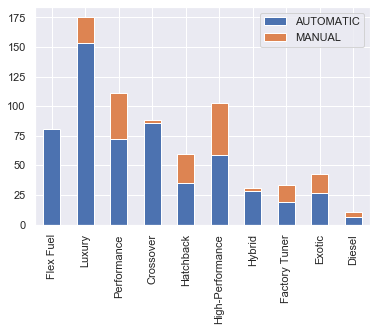

In [6]:
#2 (continued)
categories_2014 = {'AUTOMATIC': single_categories_auto, 'MANUAL':single_categories_manual}
categories_2014 = pd.DataFrame(categories_2014)
categories_2014.plot(kind='bar',stacked=True)


#It appears that Flex Fuel cars are only automatic. Most of the luxury cars are primarily automatic, while high performance
#cars are distributed almost evenly between automatic and manual.

-0.16004267885202628


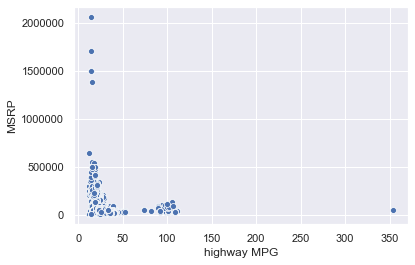

In [7]:
#3
print(data['highway MPG'].corr(data['MSRP']))

#Correlation is -0.16, which suggests a very weak negative relationship at best; however, based on 
#graph below there does not seem to be a strong relationship and it seems that a few outliers may be 
#the cause for the slightly negative correlation coefficient.
sns.scatterplot(data['highway MPG'], data['MSRP'])

In [14]:
#4
houseprices = pd.read_csv('House_Detail.csv')

oneyearchange = []

#calculating 1 year change
for i in range(len(houseprices)-1):
    temp = {'Median_CA':None, 'Median_CO':None, 'Median_NY':None, 'Median_TX':None, 'Median_IN':None}
    temp['Median_CA'] = (houseprices['Median_CA'][i+1] - houseprices['Median_CA'][i]) / houseprices['Median_CA'][i]
    temp['Median_CO'] = (houseprices['Median_CO'][i+1] - houseprices['Median_CO'][i]) / houseprices['Median_CO'][i]
    temp['Median_NY'] = (houseprices['Median_NY'][i+1] - houseprices['Median_NY'][i]) / houseprices['Median_NY'][i]
    temp['Median_TX'] = (houseprices['Median_TX'][i+1] - houseprices['Median_TX'][i]) / houseprices['Median_TX'][i]
    temp['Median_IN'] = (houseprices['Median_IN'][i+1] - houseprices['Median_IN'][i]) / houseprices['Median_IN'][i]
    
    oneyearchange.append(temp)

oneyearchange = pd.DataFrame(oneyearchange)
oneyearchange_positive = oneyearchange[oneyearchange[['Median_CA', 'Median_CO', 'Median_NY', 'Median_TX', 'Median_IN' ]] > 0] 

#the two lines below are to find smallest increase
#oneyearchange_positive.min()
#oneyearchange_positive.idxmin()

print("Smallest increase in income happened in Texas from 1985 to 1986. Only a 0.0151% increase and $8 difference")
print("went from 52988 to 52966")

Smallest increase in income happened in Texas from 1985 to 1986. Only a 0.0151% increase and $8 difference
went from 52988 to 52966


In [15]:
#5
#since car data begins from 1990 and is till 2017, we must subset housepricing data to determine the correlation over the same time period.

CA_income = houseprices['Median_CA'][6:34]
TX_income = houseprices['Median_TX'][6:34]
msrp_year = data.groupby('Year')['MSRP'].median()

ca_corr = np.corrcoef(CA_income, msrp_year)
tx_corr = np.corrcoef(TX_income, msrp_year)

print("From 1990 to 2017, California's median income is 92.7% correlated with median car msrp for that year")
print("From 1990 to 2017, Texas's median income is 61.2% correlated with median car msrp for that year")

From 1990 to 2017, California's median income is 92.7% correlated with median car msrp for that year
From 1990 to 2017, Texas's median income is 61.2% correlated with median car msrp for that year


In [16]:
#6

hp_percategory = data.groupby(['Year', 'Market Category'])['Engine HP'].mean()

hp_percategory = pd.DataFrame(hp_percategory)
hp_percategory

Engine HP
Year Market Category                                       
1990 Diesel,Luxury                               134.000000
     Hatchback                                    89.600000
     Hatchback,Factory Tuner,Luxury,Performance  164.000000
     Hatchback,Luxury,Performance                208.000000
     Luxury                                      159.888889
...                                                     ...
2017 Luxury,High-Performance                     408.310345
     Luxury,High-Performance,Hybrid              360.000000
     Luxury,Hybrid                               200.000000
     Luxury,Performance                          312.933962
     Performance                                 262.268041

[598 rows x 1 columns]